In [16]:
# Dependencies
import pandas as pd
import numpy as np

# Read CryptoCompare CSV into pandas

In [2]:
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [14]:
df.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O')],
      dtype=object)

# Filter for currencies currently being traded

In [4]:
df = df[df["IsTrading"]]

# Drop IsTrading column from the data frame

In [8]:
df.drop("IsTrading", axis = 1, inplace = True)

# Remove all rows with at least one null value

In [9]:
df.dropna(inplace = True)

In [10]:
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


# Filter for cryptocurrencies that have been mined

In [11]:
# Filter to total coins mined greater than zero

df = df[df["TotalCoinsMined"] > 0]

# Delete CoinName from original data frame

In [12]:
df.drop("CoinName", axis = 1, inplace = True)

# Convert Algorithm and ProofType into numerical data (use pandas dummies)

In [20]:
# Converting Total Coin Supply to object
df["TotalCoinSupply"] = df["TotalCoinSupply"].astype(float)
df.dtypes

Unnamed: 0          object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [22]:
# Create dummies
df = pd.get_dummies(df, drop_first = True)
df.head()

,TotalCoinsMined,TotalCoinSupply,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Examine rows and columns - did they change?

##### Yes, column count went from 4 to 627

# Standardize data set

In [23]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

# Perform dimensionality reduction with PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
# Preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components = 0.9)

In [30]:
pca.fit(scaled_df)

PCA(n_components=0.9)

In [32]:
pca_df = pca.transform(scaled_df)
len(pca_df)

532

#### How did the number of the features change?
##### Columns count went from 627 to 532

# Further reduce the dataset dimensions with t-SNE

In [33]:
from sklearn.manifold import TSNE

In [34]:
# Run t-SNE on the principal components
tsne = TSNE()

In [36]:
tsne_df = tsne.fit_transform(pca_df)
tsne_df.shape

(532, 2)

<AxesSubplot:xlabel='0', ylabel='1'>

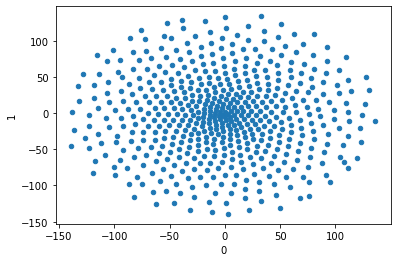

In [40]:
# Create a scatter plot of the t-SNE output
pd.DataFrame(tsne_df).plot(x = 0, y = 1, kind = "scatter")

#### Observe whether there are distinct clusters or not
##### There is a concentrated inner cluster and an outer ring

# Cluster Analysis with k-Means
## Create an elbow plot to identify the best number of clusters

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Use a for-loop to determine the inertia for each k between 1 through 10
distortions = []
for k in range(1, 10):
    model = KMeans(n_clusters = k)
    model.fit(tsne_df)
    distortions.append(model.inertia_)

C:\Users\Niki Sinclair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


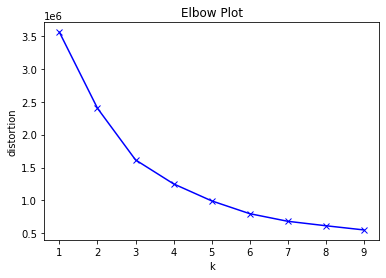

In [45]:
# Elbow plot
plt.plot(range(1, 10), distortions, "bx-")
plt.xlabel("k")
plt.ylabel("distortion")
plt.title("Elbow Plot")
plt.show()

#### Determine at which k value appears in elbow plot
##### The elbow occurs at 3

# Client Recommendation

### Can the cryptocurrencies be clustered together? If so, into how many clusters?

##### It appears that you can cluster cryptocurrencies together and there are three clusters according to my k-means model